## Capstone Project

### Improting all the dependences needed for this evaluation

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### Accessing to the data through the next link   https://geo.nyu.edu/catalog/nyu_2451_34572

In [2]:
url='https://cocl.us/new_york_dataset'
resp=requests.get(url).json()
resp

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

### Let's take a look at the first item in this list.

In [3]:
neighborhoods_data = resp['features']
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

### define the dataframe columns and instantiate the dataframe

In [4]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [5]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

### Results of Data Frame

In [6]:
#neighborhoods.head()
new_york_data=neighborhoods
new_york_data.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

### Graph of Neighborhoods per Borough in New York

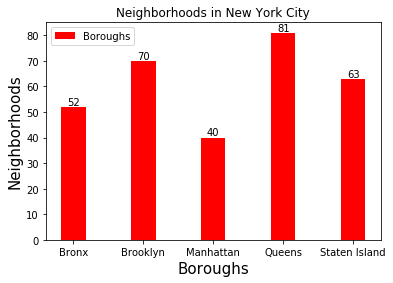

In [7]:
X=new_york_data.Borough
Y=new_york_data.groupby('Borough')['Neighborhood'].count()
N=[]
for i in Y:
    N.append(i)
#Nx=['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
Borough = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
labels=Borough


x = np.arange(len(Borough))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, N, width, label='Boroughs', color='red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Neighborhoods',fontsize = 15)
ax.set_title('Neighborhoods in New York City')
ax.set_xlabel('Boroughs',fontsize = 15)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
                  

autolabel(rects1)
#autolabel(rects2)

#fig.tight_layout()

plt.show()



In [8]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)
new_york_data.shape

The dataframe has 5 boroughs and 306 neighborhoods.


(306, 4)

#### Use geopy library to get the latitude and longitude values of New York City.

In [9]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


### Create map of New York using latitude and longitude values

In [10]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

### Define Foursquare Credentials and Version

In [11]:
CLIENT_ID = 'S5IVBRZHUGOEIVIGZ2QTK33VQXNV0ZSL0UV3UCZW3YWUY1QU' # your Foursquare ID
CLIENT_SECRET = 'O5POJ5RKMLAN5PM04OVGMQAMK5EYYECSJF0QEZ3OHQ1AA5Z0' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: S5IVBRZHUGOEIVIGZ2QTK33VQXNV0ZSL0UV3UCZW3YWUY1QU
CLIENT_SECRET:O5POJ5RKMLAN5PM04OVGMQAMK5EYYECSJF0QEZ3OHQ1AA5Z0


### Cluster only the neighborhoods in Manhattan

In [12]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()
manhattan_data.shape

(40, 4)

In [13]:
address = 'Manhattan, NY'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

40.7896239 -73.9598939


### create map of Manhattan using latitude and longitude values

In [14]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

### Extracting 100 venues with 1000 meters of radius from Manhattan

In [15]:
radius = 1000
LIMIT=100

In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
# type your answer here

manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )



Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


### Let's check the size of resulting data frame

In [18]:
print(manhattan_venues.shape)
manhattan_venues.head()

(3178, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Marble Hill              40.876551               -73.91066   
1  Marble Hill              40.876551               -73.91066   
2  Marble Hill              40.876551               -73.91066   
3  Marble Hill              40.876551               -73.91066   
4  Marble Hill              40.876551               -73.91066   

                              Venue  Venue Latitude  Venue Longitude  \
0                          Arturo's       40.874412       -73.910271   
1                       Bikram Yoga       40.876844       -73.906204   
2                     Tibbett Diner       40.880404       -73.908937   
3                         Starbucks       40.877531       -73.905582   
4  Astral Fitness & Wellness Center       40.876705       -73.906372   

  Venue Category  
0    Pizza Place  
1    Yoga Studio  
2          Diner  
3    Coffee Shop  
4            Gym

### Revise the number of venues retuened for each neighborhood

In [19]:
manhattan_venues.groupby('Venue').count()

Neighborhood  \
Venue                                                              
"U" Like                                                       1   
& Other Stories- Bryant Park                                   1   
&pizza                                                         2   
1 OAK                                                          1   
106 & Park Avenue                                              1   
11th Street Cafe                                               1   
12 Chairs                                                      1   
16 Handles                                                     2   
181 Cabrini                                                    1   
181 Gourmet Deli                                               1   
181st St Bakery & Deli                                         1   
181st Street & St. Nicholas Avenue                             1   
19 Cleveland                                                   2   
192 BOOKS                                                      1   
1st Avenue Gourmet Deli                                        1   
20 Exchange Place Gymnasium                                    1   
20 Thomas St. (The Flea Theater)                               1   
251 Ginza Sushi                                                1   
2nd Ave Deli                                                   1   
2nd Floor Bar & Essen                                          1   
3 Times                                                        1   
305 Fitness                                                    1   
305 Fitness MIDTOWN                                            1   
44 & X                                                         1   
45 Deli Market                                                 1   
45 Wall Roof Deck                                              1   
475 Main Street Fitness Center                                 1   
5 Napkin Burger                                                2   
505W37                                                         2   
505W37 Gym                                                     2   
67 Wine & Spirits                                              1   
7115 by Szeki - LES                                            1   
787 Coffee                                                     1   
83 1/2                                                         1   
86th Floor Observation Deck                                    1   
88 Chinese Restaurant                                          1   
9/11 Memorial North Pool                                       1   
9/11 Memorial South Pool                                       2   
9/11 Museum Auditorium                                         1   
9/11 Tribute Museum                                            1   
92nd Street Y                                                  1   
92nd Street Y May Center                                       1   
99 Favor Taste 99號餐廳                                           1   
A La Mode Shoppe                                               1   
A La Turka                                                     1   
A Matter of Health                                             1   
A-1 Pizza                                                      1   
ABC Carpet & Home                                              1   
ABC Kitchen                                                    1   
ACP Coffee                                                     1   
AKA Sutton Place                                               1   
AKA United Nations                                             1   
AKT in Motion                                                  1   
ALT: A Little Taste                                            1   
AMC Lincoln Square 13                                          1   
AMC Loews 84th Street 6                                        1   
AOC East                                                       1   
AQUA Studio NY                          

### Checking the uniques categories

In [20]:
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 325 uniques categories.


## Cheking whether exist Peruvian Restaurants in the venues provided by Foursquare API.

In [21]:
"Peruvian Restaurant" in manhattan_venues['Venue Category'].unique()

True

### Analyze Each Neighborhood

In [22]:
to_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
to_onehot['Neighborhoods'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [to_onehot.columns[-1]] + list(to_onehot.columns[:-1])
to_onehot = to_onehot[fixed_columns]

print(to_onehot.shape)
to_onehot.head()

(3178, 326)


Neighborhoods  Accessories Store  Adult Boutique  African Restaurant  \
0   Marble Hill                  0               0                   0   
1   Marble Hill                  0               0                   0   
2   Marble Hill                  0               0                   0   
3   Marble Hill                  0               0                   0   
4   Marble Hill                  0               0                   0   

   American Restaurant  Antique Shop  Arcade  Arepa Restaurant  \
0                    0             0       0                 0   
1                    0             0       0                 0   
2                    0             0       0                 0   
3                    0             0       0                 0   
4                    0             0       0                 0   

   Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                       0            0           0                    0   
1                       0            0           0                    0   
2                       0            0           0                    0   
3                       0            0           0                    0   
4                       0            0           0                    0   

   Asian Restaurant  Athletics & Sports  Auditorium  Australian Restaurant  \
0                 0                   0           0                      0   
1                 0                   0           0                      0   
2                 0                   0           0                      0   
3                 0                   0           0                      0   
4                 0                   0           0                      0   

   Austrian Restaurant  BBQ Joint  Baby Store  Bagel Shop  Bakery  Bank  Bar  \
0                    0          0           0           0       0     0    0   
1                    0          0           0           0       0     0    0   
2                    0          0           0           0       0     0    0   
3                    0          0           0           0       0     0    0   
4                    0          0           0           0       0     0    0   

   Baseball Field  Basketball Court  Basketball Stadium  Bed & Breakfast  \
0               0                 0                   0                0   
1               0                 0                   0                0   
2               0                 0                   0                0   
3               0                 0                   0                0   
4               0                 0                   0                0   

   Beer Bar  Beer Garden  Beer Store  Big Box Store  Bike Rental / Bike Share  \
0         0            0           0              0                         0   
1         0            0           0              0                         0   
2         0            0           0              0                         0   
3         0            0           0              0                         0   
4         0            0           0              0                         0   

   Bike Shop  Bike Trail  Bistro  Board Shop  Boat or Ferry  Bookstore  \
0          0           0       0           0              0          0   
1          0           0       0           0              0          0   
2          0           0       0           0              0          0   
3          0           0       0           0              0          0   
4          0           0       0           0              0          0   

   Boutique  Boxing Gym  Brazilian Restaurant  Breakfast Spot  Bridal Shop  \
0         0           0                     0               0            0   
1         0           0                     0               0            0   
2         0           0                     0               0            0   
3         0           0                     0             

In [23]:
to_grouped = to_onehot.groupby(["Neighborhoods"]).mean().reset_index()

print(to_grouped.shape)
to_grouped

(40, 326)


Neighborhoods  Accessories Store  Adult Boutique  \
0     Battery Park City           0.000000            0.00   
1         Carnegie Hill           0.000000            0.00   
2        Central Harlem           0.000000            0.00   
3               Chelsea           0.000000            0.00   
4             Chinatown           0.000000            0.00   
5          Civic Center           0.000000            0.00   
6               Clinton           0.000000            0.00   
7           East Harlem           0.000000            0.00   
8          East Village           0.000000            0.00   
9    Financial District           0.000000            0.00   
10             Flatiron           0.000000            0.00   
11             Gramercy           0.000000            0.00   
12    Greenwich Village           0.000000            0.00   
13     Hamilton Heights           0.000000            0.00   
14         Hudson Yards           0.000000            0.00   
15               Inwood           0.000000            0.00   
16           Lenox Hill           0.000000            0.00   
17       Lincoln Square           0.000000            0.00   
18         Little Italy           0.000000            0.00   
19      Lower East Side           0.000000            0.00   
20     Manhattan Valley           0.000000            0.00   
21       Manhattanville           0.000000            0.00   
22          Marble Hill           0.000000            0.00   
23              Midtown           0.000000            0.00   
24        Midtown South           0.000000            0.00   
25  Morningside Heights           0.000000            0.00   
26          Murray Hill           0.000000            0.00   
27                 Noho           0.000000            0.00   
28     Roosevelt Island           0.000000            0.00   
29                 Soho           0.000000            0.00   
30      Stuyvesant Town           0.000000            0.00   
31         Sutton Place           0.000000            0.01   
32              Tribeca           0.000000            0.00   
33           Tudor City           0.000000            0.00   
34           Turtle Bay           0.000000            0.00   
35      Upper East Side           0.000000            0.00   
36      Upper West Side           0.000000            0.00   
37   Washington Heights           0.010989            0.00   
38         West Village           0.000000            0.00   
39            Yorkville           0.000000            0.00   

    African Restaurant  American Restaurant  Antique Shop    Arcade  \
0             0.000000             0.014493          0.00  0.000000   
1             0.000000             0.010870          0.00  0.000000   
2             0.066667             0.044444          0.00  0.000000   
3             0.000000             0.040000          0.00  0.000000   
4             0.000000             0.030000          0.00  0.000000   
5             0.000000             0.030000          0.01  0.000000   
6             0.000000             0.040000          0.00  0.000000   
7             0.000000             0.000000          0.00  0.000000   
8             0.000000             0.020000          0.00  0.000000   
9             0.000000             0.040000          0.00  0.000000   
10            0.000000             0.030000          0.00  0.000000   
11            0.000000             0.043011          0.00  0.010753   
12            0.000000             0.020000          0.00  0.000000   
13            0.000000             0.000000          0.00  0.000000   
14            0.000000             0.071429          0.00  0.000000   
15            0.000000             0.035714          0.00  0.000000   
16            0.000000             0.000000          0.00  0.000000   
17            0.000000             0.030612          0.00  0.000000   
18            0.000000             0.000000          0.00  0.000000   
19            0.000000             0.000000    

### Filtering the data to obtain the venues of Peruvian Restaurants.

In [24]:
len(to_grouped[to_grouped["Peruvian Restaurant"] > 0])

5

## There are five Peruvian Restaurants in different neighborhoods around Manhattan

In [25]:
to_Peruvian = to_grouped[["Neighborhoods","Peruvian Restaurant"]]
to_Peruvian.head()

Neighborhoods  Peruvian Restaurant
0  Battery Park City                  0.0
1      Carnegie Hill                  0.0
2     Central Harlem                  0.0
3            Chelsea                  0.0
4          Chinatown                  0.0

### Cluster Neighborhoods in Manhattan

In [26]:
from sklearn.cluster import KMeans
toclusters = 3

to_clustering = to_Peruvian.drop(["Neighborhoods"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=toclusters, random_state=1)
kmeans.fit_transform(to_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0])

In [27]:
to_merged = to_Peruvian.copy()

# add clustering labels
to_merged["Cluster Labels"] = kmeans.labels_

In [28]:
to_merged.rename(columns={"Neighborhoods": "Neighborhood"}, inplace=True)
to_merged.head(5)

Neighborhood  Peruvian Restaurant  Cluster Labels
0  Battery Park City                  0.0               0
1      Carnegie Hill                  0.0               0
2     Central Harlem                  0.0               0
3            Chelsea                  0.0               0
4          Chinatown                  0.0               0

In [29]:
to_merged = to_merged.join(manhattan_venues.set_index("Neighborhood"), on="Neighborhood")

print(to_merged.shape)
to_merged.head()

(3178, 9)


Neighborhood  Peruvian Restaurant  Cluster Labels  \
0  Battery Park City                  0.0               0   
0  Battery Park City                  0.0               0   
0  Battery Park City                  0.0               0   
0  Battery Park City                  0.0               0   
0  Battery Park City                  0.0               0   

   Neighborhood Latitude  Neighborhood Longitude  \
0              40.711932              -74.016869   
0              40.711932              -74.016869   
0              40.711932              -74.016869   
0              40.711932              -74.016869   
0              40.711932              -74.016869   

                                Venue  Venue Latitude  Venue Longitude  \
0         Battery Park City Esplanade       40.711622       -74.017907   
0  Waterfront Plaza, Brookfield Place       40.713241       -74.016241   
0                         Hudson Eats       40.712666       -74.015901   
0            Equinox Brookfield Place       40.712704       -74.014995   
0             Brookfield Place (BFPL)       40.713240       -74.015193   

  Venue Category  
0           Park  
0          Plaza  
0     Food Court  
0            Gym  
0  Shopping Mall

In [30]:
to_merged.sort_values(["Cluster Labels"], inplace=True)
to_merged.head()

Neighborhood  Peruvian Restaurant  Cluster Labels  \
0   Battery Park City                  0.0               0   
24      Midtown South                  0.0               0   
24      Midtown South                  0.0               0   
24      Midtown South                  0.0               0   
24      Midtown South                  0.0               0   

    Neighborhood Latitude  Neighborhood Longitude  \
0               40.711932              -74.016869   
24              40.748510              -73.988713   
24              40.748510              -73.988713   
24              40.748510              -73.988713   
24              40.748510              -73.988713   

                          Venue  Venue Latitude  Venue Longitude  \
0   Battery Park City Esplanade       40.711622       -74.017907   
24                    Made Nice       40.745083       -73.988335   
24             Urban Outfitters       40.751170       -73.988150   
24               Patent Pending       40.745133       -73.990361   
24                       &pizza       40.745205       -73.988231   

    Venue Category  
0             Park  
24      Restaurant  
24  Clothing Store  
24       Speakeasy  
24     Pizza Place

### Let's visualize the resulting clusters 

In [31]:
map_clusters = folium.Map(location=[latitude, longitude],zoom_start=14)

# set color scheme for the clusters


# add markers to the map
markers_colors={}
markers_colors[0] = 'red'
markers_colors[1] = 'blue'
markers_colors[2] = 'green'
markers_colors[3] = 'yellow'
markers_colors[4] = 'cyan'
markers_colors[5] = 'black'
for lat, lon, cluster, poi in zip(to_merged['Neighborhood Latitude'], to_merged['Neighborhood Longitude'], to_merged['Cluster Labels'], to_merged['Neighborhood']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
       
    folium.features.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color =markers_colors[cluster],
        fill_color=markers_colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [32]:
#Cluster 0
to_merged.loc[(to_merged['Cluster Labels'] ==0) & (to_merged['Venue Category'] == 'Peruvian Restaurant') ]

Empty DataFrame
Columns: [Neighborhood, Peruvian Restaurant, Cluster Labels, Neighborhood Latitude, Neighborhood Longitude, Venue, Venue Latitude, Venue Longitude, Venue Category]
Index: []

In [33]:
#Cluster 1
to_merged.loc[(to_merged['Cluster Labels'] ==1) & (to_merged['Venue Category'] == 'Peruvian Restaurant') ]

Neighborhood  Peruvian Restaurant  Cluster Labels  \
26      Murray Hill             0.010204               1   
39        Yorkville             0.010000               1   
6           Clinton             0.010000               1   
36  Upper West Side             0.011494               1   

    Neighborhood Latitude  Neighborhood Longitude         Venue  \
26              40.748303              -73.978332       Pio Pio   
39              40.775930              -73.947118       Pio Pio   
6               40.759101              -73.996119       Pio Pio   
36              40.787658              -73.977059  Flor de Mayo   

    Venue Latitude  Venue Longitude       Venue Category  
26       40.745535       -73.977626  Peruvian Restaurant  
39       40.779887       -73.947202  Peruvian Restaurant  
6        40.760636       -73.994714  Peruvian Restaurant  
36       40.785966       -73.976312  Peruvian Restaurant

In [34]:
#Cluster 2
to_merged.loc[(to_merged['Cluster Labels'] ==2) & (to_merged['Venue Category'] == 'Peruvian Restaurant') ]

Neighborhood  Peruvian Restaurant  Cluster Labels  Neighborhood Latitude  \
14  Hudson Yards             0.017857               2              40.756658   

    Neighborhood Longitude  Venue  Venue Latitude  Venue Longitude  \
14              -74.000111  Chirp       40.753377       -73.996116   

         Venue Category  
14  Peruvian Restaurant

In [55]:
df_PV=to_merged.loc[to_merged['Venue Category'] == 'Peruvian Restaurant']
df_PV

Neighborhood  Peruvian Restaurant  Cluster Labels  \
26      Murray Hill             0.010204               1   
39        Yorkville             0.010000               1   
6           Clinton             0.010000               1   
36  Upper West Side             0.011494               1   
14     Hudson Yards             0.017857               2   

    Neighborhood Latitude  Neighborhood Longitude         Venue  \
26              40.748303              -73.978332       Pio Pio   
39              40.775930              -73.947118       Pio Pio   
6               40.759101              -73.996119       Pio Pio   
36              40.787658              -73.977059  Flor de Mayo   
14              40.756658              -74.000111         Chirp   

    Venue Latitude  Venue Longitude       Venue Category  
26       40.745535       -73.977626  Peruvian Restaurant  
39       40.779887       -73.947202  Peruvian Restaurant  
6        40.760636       -73.994714  Peruvian Restaurant  
36       40.785966       -73.976312  Peruvian Restaurant  
14       40.753377       -73.996116  Peruvian Restaurant

In [56]:
df_PV.columns=['Neighborhood','Peruvian Restaurant','Cluster Labels','X','Y', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
df_PV

Neighborhood  Peruvian Restaurant  Cluster Labels          X  \
26      Murray Hill             0.010204               1  40.748303   
39        Yorkville             0.010000               1  40.775930   
6           Clinton             0.010000               1  40.759101   
36  Upper West Side             0.011494               1  40.787658   
14     Hudson Yards             0.017857               2  40.756658   

            Y         Venue  Venue Latitude  Venue Longitude  \
26 -73.978332       Pio Pio       40.745535       -73.977626   
39 -73.947118       Pio Pio       40.779887       -73.947202   
6  -73.996119       Pio Pio       40.760636       -73.994714   
36 -73.977059  Flor de Mayo       40.785966       -73.976312   
14 -74.000111         Chirp       40.753377       -73.996116   

         Venue Category  
26  Peruvian Restaurant  
39  Peruvian Restaurant  
6   Peruvian Restaurant  
36  Peruvian Restaurant  
14  Peruvian Restaurant

### Let's visualize the Peruvan Restaurants around the Manhattan map.

In [57]:
# create map and display it
peruvian_map = folium.Map(location=[latitude, longitude], zoom_start=13)

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Manhattan, NY',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(peruvian_map)


# loop through the 100 crimes and add each to the map
for lat, lng, label in zip(df_PV.X, df_PV.Y, df_PV.Venue):
    folium.features.CircleMarker(
        [lat, lng],
        radius=8, # define how big you want the circle markers to be
        color='blank',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(peruvian_map)

# show map
peruvian_map